In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_excel(('../Dataset/Reservations.xlsx'))
data.head(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Question 1 : Remove Duplicate Values**

In [4]:
df = data.drop_duplicates()

In [5]:
df.shape

(87396, 32)

**Question2 : Imputation of missing values**

We Drop Company and Agent Columns as they are not accurate

In [6]:
df.drop(["company", "agent"], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df.shape

(87396, 30)

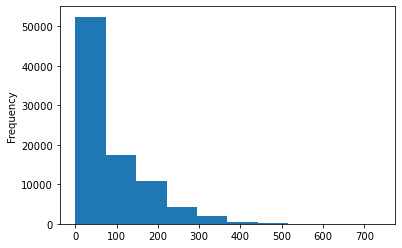

In [8]:
lead_time_plot = df["lead_time"].plot.hist()

In [9]:
df["lead_time"].median()

49.0

We fill the null values of Country columns with mode

In [10]:
repl = df["country"].mode()[0]
df["country"].fillna(repl, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
print(df["children"].mean())
print(df["children"].median())

0.13863969242035884
0.0


Since the number of children cannot be a decimal, we replace the missing values with the median, i.e., 0 over here.

In [12]:
df["children"].fillna(df["children"].median(), inplace = True)

In [13]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

No Null Values are now present in Dataset so the Data is Imputed


**Question 3 : Remove outliers**

In [15]:
df_box = df.select_dtypes(include = 'number')
df_box.drop(columns = ["arrival_date_year", "arrival_date_day_of_month"], inplace = True)

In [16]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87396 non-null  int64  
 1   lead_time                       87396 non-null  int64  
 2   arrival_date_week_number        87396 non-null  int64  
 3   stays_in_weekend_nights         87396 non-null  int64  
 4   stays_in_week_nights            87396 non-null  int64  
 5   adults                          87396 non-null  int64  
 6   children                        87396 non-null  float64
 7   babies                          87396 non-null  int64  
 8   is_repeated_guest               87396 non-null  int64  
 9   previous_cancellations          87396 non-null  int64  
 10  previous_bookings_not_canceled  87396 non-null  int64  
 11  booking_changes                 87396 non-null  int64  
 12  days_in_waiting_list           

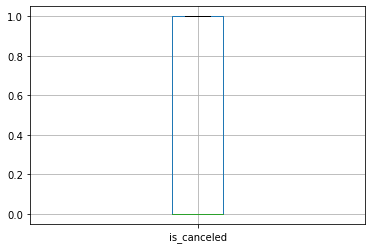

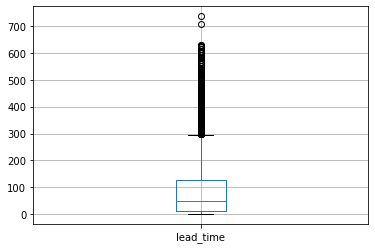

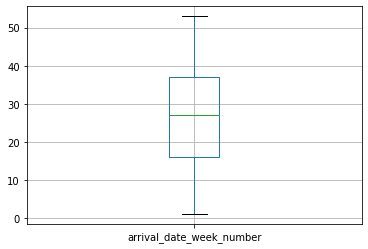

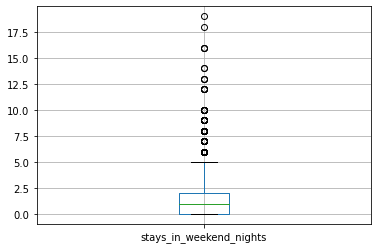

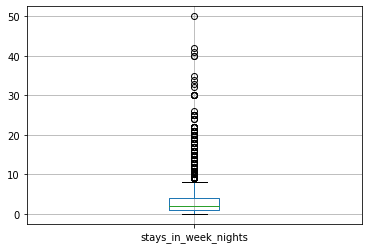

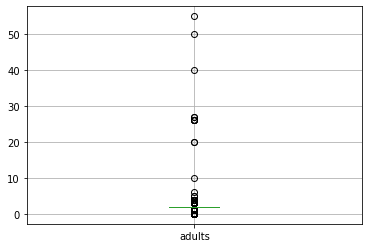

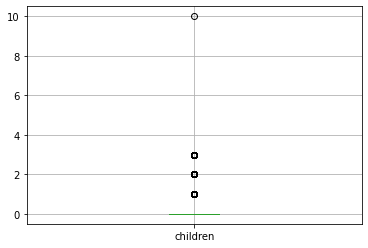

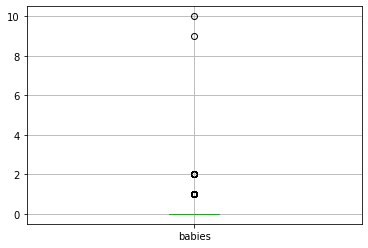

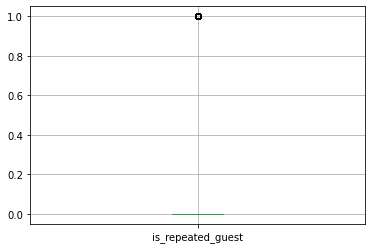

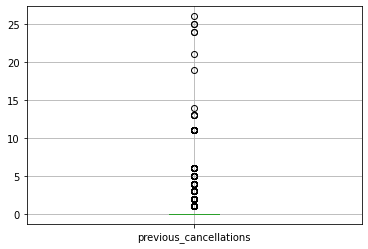

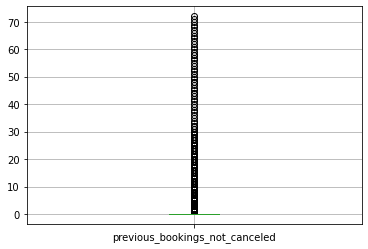

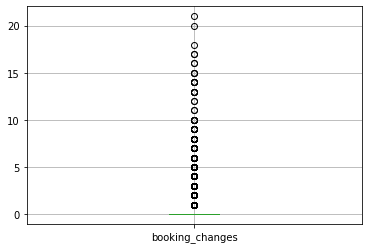

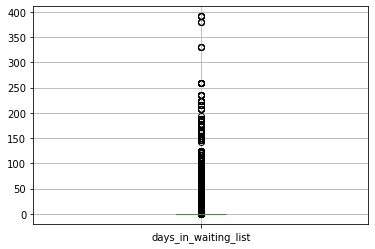

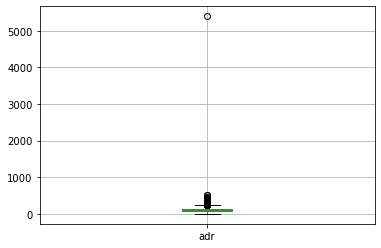

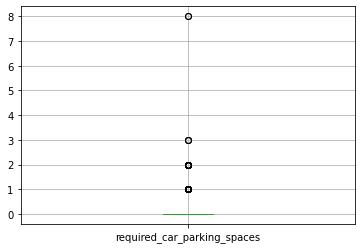

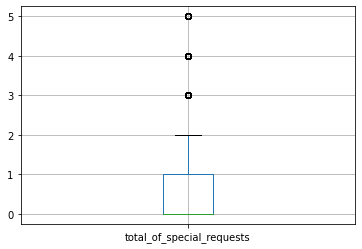

In [17]:
for column in df_box:
    plt.figure()
    df_box.boxplot([column])

In [18]:
from scipy import stats
import numpy as np

df.shape


(87396, 30)

In [20]:
df = df[(np.abs(stats.zscore(df['days_in_waiting_list'])) < 3)]
df = df[(np.abs(stats.zscore(df['total_of_special_requests'])) < 3)]

In [21]:
df.shape

(86379, 30)

**Question 4 : Correlation analysis**

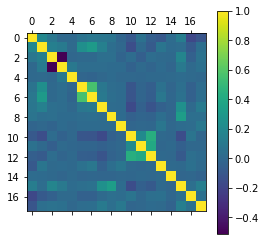

In [22]:
plot = plt.matshow(df.corr())
plt.colorbar(plot)

We Observe that rows are not highly correlated

**Question 5 : Data Transformation**

In [23]:
df['total_children'] = df['children'].astype(int) +df['babies'].astype(int)
df.drop(['children', 'babies'], axis=1, inplace=True)

In [25]:
df['arrival_date'] = df['arrival_date_day_of_month'].astype(str)+ " " + df['arrival_date_month'] + " " + df['arrival_date_year'].astype(str)
df["arrival_date"] = pd.to_datetime(df["arrival_date"])
df.drop(['arrival_date_day_of_month', 'arrival_date_month' , 'arrival_date_year' , 'arrival_date_week_number'], axis=1, inplace=True)

In [28]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_children,arrival_date
0,Resort Hotel,0,342,0,0,2,BB,PRT,Direct,Direct,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01
1,Resort Hotel,0,737,0,0,2,BB,PRT,Direct,Direct,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01
2,Resort Hotel,0,7,0,1,1,BB,GBR,Direct,Direct,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,2015-07-01
3,Resort Hotel,0,13,0,1,1,BB,GBR,Corporate,Corporate,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,2015-07-01
4,Resort Hotel,0,14,0,2,2,BB,GBR,Online TA,TA/TO,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2015-07-01


In [29]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [30]:
df = pd.get_dummies(df, columns = ["hotel"])

In [31]:
df

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_children,arrival_date,hotel_City Hotel,hotel_Resort Hotel
0,0,342,0,0,2,BB,PRT,Direct,Direct,0,...,Transient,0.00,0,0,Check-Out,2015-07-01,0,2015-07-01,0,1
1,0,737,0,0,2,BB,PRT,Direct,Direct,0,...,Transient,0.00,0,0,Check-Out,2015-07-01,0,2015-07-01,0,1
2,0,7,0,1,1,BB,GBR,Direct,Direct,0,...,Transient,75.00,0,0,Check-Out,2015-07-02,0,2015-07-01,0,1
3,0,13,0,1,1,BB,GBR,Corporate,Corporate,0,...,Transient,75.00,0,0,Check-Out,2015-07-02,0,2015-07-01,0,1
4,0,14,0,2,2,BB,GBR,Online TA,TA/TO,0,...,Transient,98.00,0,1,Check-Out,2015-07-03,0,2015-07-01,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,21,2,5,2,BB,BEL,Offline TA/TO,TA/TO,0,...,Transient,96.14,0,2,Check-Out,2017-09-06,0,2017-08-30,1,0
119385,0,23,2,5,2,BB,BEL,Offline TA/TO,TA/TO,0,...,Transient,96.14,0,0,Check-Out,2017-09-06,0,2017-08-30,1,0
119386,0,102,2,5,3,BB,FRA,Online TA,TA/TO,0,...,Transient,225.43,0,2,Check-Out,2017-09-07,0,2017-08-31,1,0
119388,0,109,2,5,2,BB,GBR,Online TA,TA/TO,0,...,Transient,104.40,0,0,Check-Out,2017-09-07,0,2017-08-31,1,0


In [32]:
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

Here we will drop the one hot column for the undefined meal, since that would be redundant

In [33]:
df = pd.get_dummies(df, prefix = None, columns = ["meal"])

In [34]:
df.drop(["meal_Undefined"], axis = 1, inplace = True)

In [35]:
print(df["market_segment"].unique())
print(df["distribution_channel"].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [36]:
df = pd.get_dummies(df, prefix = None, columns = ["market_segment", "distribution_channel"])

In [37]:
df.drop(["distribution_channel_Undefined", "market_segment_Undefined"], axis = 1, inplace = True)

In [38]:
df["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [39]:
df = pd.get_dummies(df, prefix = None, columns = ["deposit_type"])

In [40]:
df["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [41]:
df = pd.get_dummies(df, prefix = None, columns = ["reservation_status"])

In [42]:
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [43]:
df = pd.get_dummies(df, prefix = None, columns = ["customer_type"])

In [44]:
df

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,PRT,0,0,0,C,...,1,0,0,0,1,0,0,0,1,0
1,0,737,0,0,2,PRT,0,0,0,C,...,1,0,0,0,1,0,0,0,1,0
2,0,7,0,1,1,GBR,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
3,0,13,0,1,1,GBR,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
4,0,14,0,2,2,GBR,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,21,2,5,2,BEL,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
119385,0,23,2,5,2,BEL,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
119386,0,102,2,5,3,FRA,0,0,0,E,...,1,0,0,0,1,0,0,0,1,0
119388,0,109,2,5,2,GBR,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0


In [45]:
country_frame = pd.DataFrame(df['country'].value_counts('PRT'))

We map each element in the country column to a corresponding weight based on their count with respect to the count of the country with the highest count in the entire column, and then replace with their corresponding weights.

In [46]:
country_frame.reset_index(inplace = True)

In [47]:
country_dict = {}
for i in range(country_frame.shape[0]):
  country_dict[country_frame["index"][i]] = country_frame["country"][i]

In [48]:
country_dict

{'PRT': 0.317403535581565,
 'GBR': 0.1198439435510946,
 'FRA': 0.10130934602160248,
 'ESP': 0.08344620799036803,
 'DEU': 0.06161219740909249,
 'ITA': 0.03495062457310226,
 'IRL': 0.034765394366686346,
 'BEL': 0.023894696627652555,
 'BRA': 0.02286435360446405,
 'NLD': 0.02198451012398847,
 'USA': 0.02152143460794869,
 'CHE': 0.018071522013452343,
 'CN': 0.012607230924182962,
 'AUT': 0.010743351972122854,
 'SWE': 0.009631970733627386,
 'CHN': 0.009377279199805508,
 'POL': 0.008728973477349819,
 'RUS': 0.006402019009249933,
 'NOR': 0.005915789717408166,
 'ROU': 0.005255907107051482,
 'FIN': 0.00488544669421966,
 'ISR': 0.004514986281387837,
 'DNK': 0.004410794290278887,
 'AUS': 0.004364486738674909,
 'AGO': 0.003936141886338115,
 'LUX': 0.003009990854258558,
 'MAR': 0.002674261105129719,
 'TUR': 0.0024311464592088354,
 'ARG': 0.0023501082439018744,
 'HUN': 0.0023269544680998852,
 'JPN': 0.002106993597980991,
 'IND': 0.0016439180819412126,
 'CZE': 0.001528149202931268,
 'KOR': 0.0013776496

In [49]:
df.replace({"country": country_dict})

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0.317404,0,0,0,C,...,1,0,0,0,1,0,0,0,1,0
1,0,737,0,0,2,0.317404,0,0,0,C,...,1,0,0,0,1,0,0,0,1,0
2,0,7,0,1,1,0.119844,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
3,0,13,0,1,1,0.119844,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
4,0,14,0,2,2,0.119844,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,21,2,5,2,0.023895,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
119385,0,23,2,5,2,0.023895,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
119386,0,102,2,5,3,0.101309,0,0,0,E,...,1,0,0,0,1,0,0,0,1,0
119388,0,109,2,5,2,0.119844,0,0,0,A,...,1,0,0,0,1,0,0,0,1,0
